In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

# Parte 4
Observem os níveis de mensuração das variáveis. Se todas forem qualitativas lembrem-se de registrar frequências absolutas e percentuais. Se uma for quantitativa, NÃO CATEGORIZE a variável, use medidas de síntese em função dos valores das qualitativas. JUSTIFIQUEM as variáveis escolhidas para a análise, JUSTIFIQUEM as respostas (usando tabelas de frequências, gráficos ou quaisquer medidas de síntese necessárias).

## Questão 17
As conclusões da questão 10 valem para os três turnos?

In [2]:
# Cria copia do dataframe para trabalhar em cima
df_17 = df.copy()
# Converte as opiniões categóricas em valores quantitativos de 0 a 4
df_17["OpiniãoNum"] = df["Opinião"].dropna().apply(lambda x: ["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"].index(x))

df_17_mean = df_17.groupby(["Curso", "Turno"])["OpiniãoNum"].mean().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_17_mean["Média"] = df_17.groupby(["Curso"])["OpiniãoNum"].mean().reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_17_mean.loc["Média"] = list(df_17.groupby(["Turno"])["OpiniãoNum"].mean().reindex(["Diurno", "Integral", "Noturno"])) + [df_17["OpiniãoNum"].mean()]

df_17_mean

Turno,Diurno,Integral,Noturno,Média
Curso,,,,
Mecânica,2.215190,0.701220,3.270270,1.059925
Produção,2.470668,1.264975,3.510638,2.057739
Química,2.718824,1.565365,3.653756,2.770070
Civil,2.888514,1.785714,3.810105,3.323711
Computação,2.954839,1.883333,3.840217,3.535189
Elétrica,3.206612,1.687500,3.943609,3.858503
Média,2.657034,1.091726,3.793744,2.616441


In [3]:
# # Agrupa as opiniões dentro de cada turno de cada curso e conta o número de ocorrências
# df_17 = df.groupby(["Turno", "Curso", "Opinião"])["Opinião"].count().unstack(fill_value=0)
# # Corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
# df_17 = df_17[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# # Calcula as porcentagens de opiniões dentro de cada curso
# df_17p = df_17.div(0.01*df_17.sum(axis=1), axis=0)
# df_17p

In [4]:
# fig, axes = plt.subplots(nrows=6, ncols=3, sharex=True, sharey=True, figsize=(11, 20))
# axes = df_17p.T.plot(ax=axes, kind="barh", color=default_color, edgecolor = "black", legend=False, subplots=True, title="Relação entre cursos e turnos sobre a opinião")


# for ax in axes:
#     ax.set_xlabel("Frequência relativa (%)")
#     ax.grid(axis="x", color=default_grid_color)

# # Salva figura na pasta dedicada
# plt.savefig('Figuras\Q17.png', bbox_inches='tight')

In [5]:
space = ": "
def num2opi(x):
    if x <= 0.5: 
        return str(round(x,1)) + space + "Muito insat."
    if x > 0.5 and x <= 1.5:
        return str(round(x,1)) + space + "Insatisfeito"
    if x > 1.5 and x <= 2.5:
        return str(round(x,1)) + space + "Indiferente"
    if x > 2.5 and x <= 3.5:
        return str(round(x,1)) + space + "Satisfeito"
    if x > 3.5:
        return str(round(x,1)) + space + "Muito sat."
    
df_17_mean.applymap(num2opi).to_csv("Q17.csv", encoding='utf-8', index=True)


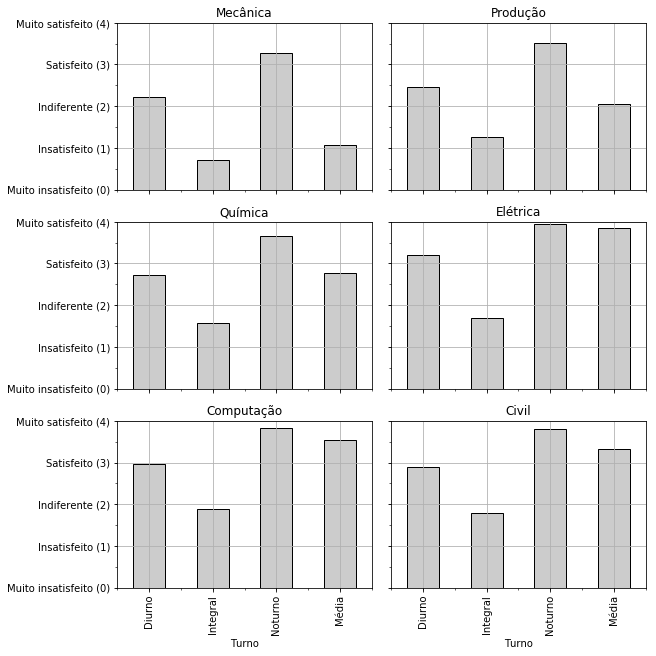

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(9,9), constrained_layout=True)


for i in range(6):
        curso=df["Curso"].dropna().unique()[i]
        
        ax = df_17_mean.T[curso].plot(ax=axes[i-3*math.floor(i/3)][math.floor(i/3)], kind='bar', color=default_color, 
                            edgecolor = "black", grid=True, legend=False, sharex=True, ylim=(0,4), yticks=np.arange(0,5,1), title=curso)
        ax.set_yticklabels(["Muito insatisfeito (0)", "Insatisfeito (1)", "Indiferente (2)", "Satisfeito (3)", "Muito satisfeito (4)"])


# Salva figura na pasta dedicada
plt.savefig('Figuras\Q17.png', bbox_inches='tight', dpi=dpi)

Notou-se sim uma diferença de opiniões dependendo do turno do cada aluno do mesmo curso. Nos cursos de Eng. Civil, Computação, Eng. Elétrica e Eng. Química há muito mais alunos satisfeitos e muito satisfeitos no turno noturno em comparação aos outros turnos. Além disso, em todos os cursos, o turno Integral foi o que obteve a pior classificação pelos alunos.

## Questão 18
As conclusões da questão 14 valem para alunos de todos os cursos?

In [14]:
# Agrupa as renda, mostra o número de opiniões para cada grupo, e corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
#bins = [1, 1.5, 2.5, 4, 6, 9, 13, 18, 25] #5*math.log10(df["Renda"].count())
bins = [1, 2, 6, 25]
df_18 = df.groupby([pd.cut(df["Renda"], bins), "Curso", "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito satisfeito", "Satisfeito", "Indiferente", "Insatisfeito", "Muito insatisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada grupo
df_18p = df_18.div(0.01*df_18.sum(axis=1), axis=0)
df_18

Opinião             Muito satisfeito  Satisfeito  Indiferente  Insatisfeito  \
Renda   Curso                                                                 
(1, 2]  Civil                    499         249           87            18   
        Computação               768         293           66            11   
        Elétrica                1052         133           13             4   
        Mecânica                  47         165          220           254   
        Produção                 256         463          377           241   
        Química                  690         677          323           161   
(2, 6]  Civil                      7          27           29            24   
        Computação                18          24           23            17   
        Elétrica                  12           9            5             6   
        Mecânica                   1          11           67           419   
        Produção                   5          55          153           319   
        Química                   12          66          120           178   
(6, 25] Civil                      1           0            1             2   
        Computação                 2           1            0             1   
        Elétrica                   2           0            0             0   
        Mecânica                   0           0            1             9   
        Produção                   0           1            1             3   
        Química                    0           4            3             1   

Opinião             Muito insatisfeito  
Renda   Curso                           
(1, 2]  Civil                        0  
        Computação                   1  
        Elétrica                     0  
        Mecânica                    53  
        Produção                    19  
        Química                      5  
(2, 6]  Civil                        3  
        Computação                   3  
        Elétrica                     0  
        Mecânica                   544  
        Produção                   157  
        Química                     30  
(6, 25] Civil                        0  
        Computação                   0  
        Elétrica                     0  
        Mecânica                    73  
        Produção                     5  
        Química                      2

In [8]:
# bins = [1, 2, 6, 25]
# df_14B = df.groupby([pd.cut(df["Renda"], bins), "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# # Calcula as porcentagens de opiniões dentro de cada grupo
# df_14Bp = df_14B.div(0.01*df_14B.sum(axis=1), axis=0)

# Imprime 3 gráficos para cada faixa de renda
# fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, figsize=(11, 2))
# df_18p.unstack().unstack().unstack().unstack().plot(ax=axes, kind="barh", legend=False, subplots=True, edgecolor = "black", color=default_color, title="Relação entre faixas de rendas, cursos e opiniões")
# df_18p.T.plot(ax=axes, kind="bar", legend=False, subplots=True, edgecolor = "black", color=default_color, title="Relação entre faixas de rendas, cursos e opiniões")

# df_18p.T.iloc[:,0:6].plot(ax=axes, kind="barh", legend=False, subplots=True, edgecolor = "black", color=default_color)
# for ax in axes:
#     axes.set_label("Sa")

# for ax in axes:
#     ax.set_xlabel("Frequência relativa (%)")
#     ax.set_xticks(np.arange(0, 80, 10))
#     ax.set_xticks(np.arange(0, 80, 5), minor=True)
#     ax.grid(axis="x", color=default_grid_color)

# Salva figura na pasta dedicada
# plt.savefig('Figuras\Q18.png', bbox_inches='tight', dpi=dpi)

In [9]:
df_18 = df.copy()
df_18["OpiniãoNum"] = df["Opinião"].dropna().apply(lambda x: ["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"].index(x))
df_18_mean = df_18.groupby(["Curso", pd.cut(df["Renda"], [1, 2, 6, 25])])["OpiniãoNum"].mean().unstack(fill_value=0).reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])

df_18_mean.columns = ["1 - 2", "2 - 6", "6 - 25"]
df_18_mean["Média"] = df_18.groupby(["Curso"])["OpiniãoNum"].mean().reindex(["Mecânica", "Produção", "Química", "Civil", "Computação", "Elétrica"])
df_18_mean.loc["Média"] = list(df_18.groupby(pd.cut(df["Renda"], [1, 2, 6, 25]))["OpiniãoNum"].mean()) + [df_18["OpiniãoNum"].mean()]

df_18_mean

,1 - 2,2 - 6,6 - 25,Média
Curso,,,,
Mecânica,1.863329,0.566219,0.132530,1.059925
Produção,2.513274,1.175617,0.800000,2.057739
Química,3.016164,1.635468,1.900000,2.770070
Civil,3.440797,2.122222,2.000000,3.323711
Computação,3.594381,2.435294,3.000000,3.535189
Elétrica,3.857737,2.843750,4.000000,3.858503
Média,3.086453,1.090290,0.584071,2.616441


In [10]:
space = ": "
def num2opi(x):
    if x <= 0.5: 
        return str(round(x,1)) + space + "Muito insat."
    if x > 0.5 and x <= 1.5:
        return str(round(x,1)) + space + "Insatisfeito"
    if x > 1.5 and x <= 2.5:
        return str(round(x,1)) + space + "Indiferente"
    if x > 2.5 and x <= 3.5:
        return str(round(x,1)) + space + "Satisfeito"
    if x > 3.5:
        return str(round(x,1)) + space + "Muito sat."
    
df_18_mean.applymap(num2opi).to_csv("Q18.csv", encoding='utf-8', index=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000205D9BA4B00>,
      dtype=object)

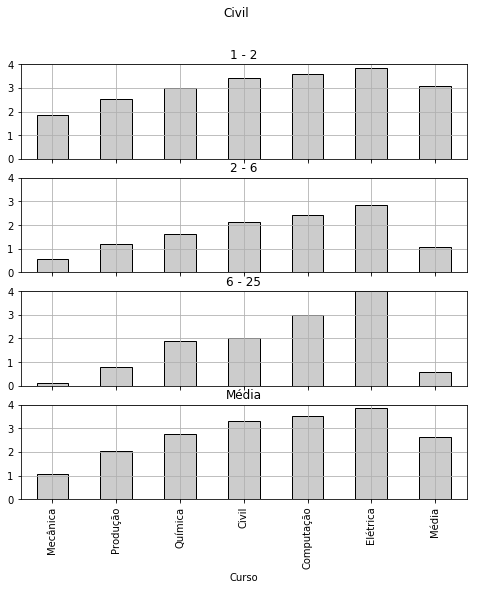

In [11]:
df_18_mean.plot(kind='bar', color=default_color, subplots=True, figsize=(8,8),
                            edgecolor = "black", grid=True, legend=False, sharex=True, ylim=(0,4), yticks=np.arange(0,5,1), title=curso)

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

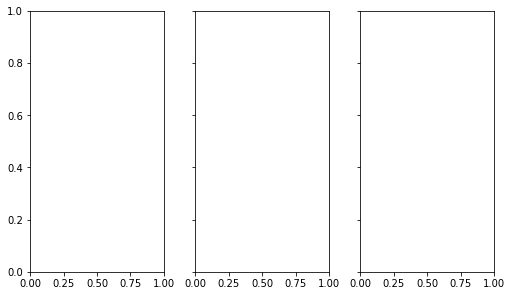

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(7,4), constrained_layout=True)


for i in range(3):
#         curso=df["Curso"].dropna().unique()[i]
    df_18_mean[df_18_mean.columns[i]]
    ax = df_18_mean.loc[i].plot(ax=axes[i-3*math.floor(i/3)][math.floor(i/3)], kind='bar', color=default_color, 
                            edgecolor = "black", grid=True, legend=False, sharex=True, ylim=(0,4), yticks=np.arange(0,5,1), title=curso)
#         ax.set_yticklabels(["Muito insatisfeito (0)", "Insatisfeito (1)", "Indiferente (2)", "Satisfeito (3)", "Muito satisfeito (4)"])


# Salva figura na pasta dedicada
# plt.savefig('Figuras\Q18.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(7,9), constrained_layout=True)


for i in range(6):
        curso=df["Curso"].dropna().unique()[i]
        
        ax = df_18_mean.T[curso].plot(ax=axes[i-3*math.floor(i/3)][math.floor(i/3)], kind='bar', color=default_color, 
                            edgecolor = "black", grid=True, legend=False, sharex=True, ylim=(0,4), yticks=np.arange(0,5,1), title=curso)
        ax.set_yticklabels(["Muito insatisfeito (0)", "Insatisfeito (1)", "Indiferente (2)", "Satisfeito (3)", "Muito satisfeito (4)"])


# Salva figura na pasta dedicada
plt.savefig('Figuras\Q18.png', bbox_inches='tight', dpi=dpi)